In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/home/lagvna/WykazCzasopism/resources/wykaz.csv")

/home/lagvna/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unnamed: 0,Wykaz czasopism naukowych,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,archeologia,filozofia,...,prawo kanoniczne,psychologia,astronomia,informatyka,matematyka,nauki biologiczne,nauki chemiczne,nauki fizyczne,nauki o Ziemi i środowisku,nauki teologiczne
2,Lp.,Tytuł 1,issn,e-issn,Tytuł 2,issn,e-issn,Punkty,101,102,...,510,511,601,602,603,604,605,606,607,701
3,1,2D Materials,2053-1583,2053-1583,2D Materials,NaN,2053-1583,140,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,x,x,NaN,NaN
4,2,3 Biotech,2190-572X,2190-5738,3 Biotech,2190-572X,2190-5738,70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN


In [4]:
df.columns = df.iloc[2]

In [5]:
df.drop([0, 1, 2], inplace = True)

In [6]:
df = df[['Tytuł 1', 'Punkty']]

In [7]:
replacement_dict = {20: 1, 40: 2, 70: 3, 100: 4, 140: 5, 200: 6}

In [8]:
df['Punkty'].nunique()
df['Punkty'] = pd.to_numeric(df['Punkty'])
df['Punkty'].unique()

array([140,  70,  20, 100,  40, 200])

In [9]:
df = df.replace({"Punkty": replacement_dict})
df.head()

2,Tytuł 1,Punkty
3,2D Materials,5
4,3 Biotech,3
5,3C Empresa,1
6,3c Tecnologia,1
7,3C Tic,1


In [10]:
length = len(df)
midpoint = int(0.95 * length)

In [11]:
df = df.reindex(np.random.permutation(df.index))
train = df[:midpoint]
test = df[midpoint:]
train

2,Tytuł 1,Punkty
15786,PCI JOURNAL,2
8248,INDUSTRIAL AND COMMERCIAL TRAINING,2
3283,CARNETS DE GEOLOGIE,3
28949,Habitus - Revista de Antropologia e Arqueologia,1
26674,Synergy,2
...,...,...
15923,PET Clinics,3
21639,City,5
26249,Rinsan Shikenj Oha/Journal of the Hokkaido For...,1
215,ACTA GEOLOGICA POLONICA,3


In [12]:
test

2,Tytuł 1,Punkty
13312,Kino-The Western Undergraduate Journal of Film...,1
1922,ASIAN PACIFIC JOURNAL OF ALLERGY AND IMMUNOLOGY,2
22128,Educacion Matematica,1
2435,BIOLOGICAL & PHARMACEUTICAL BULLETIN,3
1736,Argos,1
...,...,...
15235,NUCLEAR PHYSICS A,4
23672,JBJS Case Connector,1
11622,Journal of Laparoendoscopic & Advanced Surgica...,2
1707,Archives of Womens Mental Health,4


In [13]:
from tensorflow.keras.utils import to_categorical

training_sentences = [i for i in train['Tytuł 1']]
testing_sentences = [i for i in test['Tytuł 1']]
training_labels = [int(i) for i in train['Punkty']]
testing_labels = [int(i) for i in test['Punkty']]

training_labels = training_labels
testing_labels = testing_labels


training_labels_final = to_categorical(training_labels)
testing_labels_final = to_categorical(testing_labels)

In [14]:
vocab_size = 10000
embedding_dim = 7
max_length = 20
trunc_type='post'
oov_tok = "<OOV>"

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [16]:
testing_labels_final[2]

#from tensorflow.keras.utils.np_utils import to_categorical

array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
from tensorflow.keras.layers import Dense, LSTM, SpatialDropout1D, Embedding, GRU, Conv1D, GlobalMaxPooling1D
from tensorflow.keras import regularizers

adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)


model = tf.keras.Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
#model.add(SpatialDropout1D(0.2))
#model.add(LSTM(32, dropout=0.2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0)))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0)))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0)))

model.add(Dense(7,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics = ['accuracy'])
print(model.summary())

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout = 0.4)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(21, activation='softmax')
# ])

# adam = tf.keras.optimizers.Adam(learning_rate=0.0001, name='Adam')

# model.compile(loss='categorical_crossentropy',optimizer=adam, metrics=['accuracy'])
# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 7)             70000     
_________________________________________________________________
conv1d (Conv1D)              (None, 16, 128)           4608      
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              132096    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1

In [18]:
num_epochs = 100
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=128, validation_data=(testing_padded, testing_labels_final))

Epoch 1/100
216/216 [==============================] - 6s 29ms/step - loss: 1.5050 - accuracy: 0.3683 - val_loss: 1.4805 - val_accuracy: 0.3939
Epoch 2/100
216/216 [==============================] - 6s 27ms/step - loss: 1.3983 - accuracy: 0.4014 - val_loss: 1.4729 - val_accuracy: 0.4070
Epoch 3/100
216/216 [==============================] - 6s 27ms/step - loss: 1.3121 - accuracy: 0.4357 - val_loss: 1.5045 - val_accuracy: 0.4001
Epoch 4/100
216/216 [==============================] - 6s 27ms/step - loss: 1.2394 - accuracy: 0.4691 - val_loss: 1.5850 - val_accuracy: 0.3506
Epoch 5/100
216/216 [==============================] - 6s 26ms/step - loss: 1.1797 - accuracy: 0.4929 - val_loss: 1.6214 - val_accuracy: 0.3836
Epoch 6/100
216/216 [==============================] - 6s 27ms/step - loss: 1.1176 - accuracy: 0.5252 - val_loss: 1.7475 - val_accuracy: 0.3747
Epoch 7/100
216/216 [==============================] - 6s 28ms/step - loss: 1.0669 - accuracy: 0.5567 - val_loss: 1.8129 - val_accuracy:

216/216 [==============================] - 6s 27ms/step - loss: 0.3614 - accuracy: 0.8600 - val_loss: 6.2417 - val_accuracy: 0.3361
Epoch 58/100
216/216 [==============================] - 6s 28ms/step - loss: 0.3482 - accuracy: 0.8649 - val_loss: 6.4056 - val_accuracy: 0.3361
Epoch 59/100
216/216 [==============================] - 6s 29ms/step - loss: 0.3447 - accuracy: 0.8663 - val_loss: 6.5256 - val_accuracy: 0.3326
Epoch 60/100
216/216 [==============================] - 6s 28ms/step - loss: 0.3244 - accuracy: 0.8741 - val_loss: 7.1093 - val_accuracy: 0.3368
Epoch 61/100
216/216 [==============================] - 6s 30ms/step - loss: 0.3224 - accuracy: 0.8770 - val_loss: 6.6826 - val_accuracy: 0.3320
Epoch 62/100
216/216 [==============================] - 6s 30ms/step - loss: 0.3118 - accuracy: 0.8785 - val_loss: 6.7393 - val_accuracy: 0.3271
Epoch 63/100
216/216 [==============================] - 6s 29ms/step - loss: 0.3155 - accuracy: 0.8795 - val_loss: 6.3530 - val_accuracy: 0.338

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

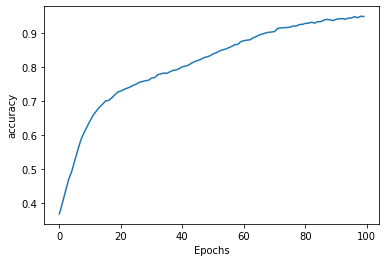

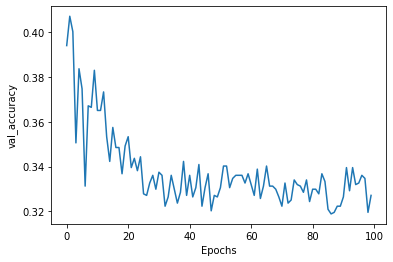

In [20]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'val_accuracy')

In [21]:
title = 'distributed computing'
token_list = tokenizer.texts_to_sequences([title])[0]
token_list = pad_sequences([token_list], maxlen=max_length-1, padding='post')
predicted = model.predict_classes(token_list, verbose=0)

print(predicted)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[3]
